# Model Analysis 

This program takes in a folder name with datasets and models, and in that folder generates a series of images and videos describing how the loss landscape changes over time.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

import time
import glob

# Importing our existing funcs
import os
import sys
from pathlib import Path

from minima_volume.dataset_funcs import ( load_models_and_data )

from minima_volume.landscape_videos import (
    plot_3d_loss_landscape,
    load_computed_loss_landscapes,
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Model

In [2]:
# User specifies the model module name
import MNIST_model_data as model_module

# Generate dataset
#x_base, y_base, x_test, y_test = model_module.get_dataset(
#    device = device
#)

# MNIST specific initialization parameters
hidden_dims = [256, 128]

# Grab model
model_template = model_module.get_model(hidden_dims=hidden_dims, device=device, seed=0)

# Grab loss and metrics
loss_fn_per_sample = model_module.get_loss_fn_per_sample()

## Loading Model and Datasets

In [3]:
# Get the relative path
target_dir = Path("models_and_data") #current directory

# Lists to store loaded models and additional data
loaded_models, loaded_additional_data, loaded_dataset = load_models_and_data(model_template=model_template, target_dir=target_dir, device="cpu")

# Print dataset information
print(f"Dataset type: {loaded_dataset['dataset_type']}")
print(f"Dataset quantities: {loaded_dataset['dataset_quantities']}")

# Print tensor shapes
print("\nTensor shapes:")
for key in ["x_base_train", "y_base_train", "x_additional", "y_additional", "x_test", "y_test"]:
    if loaded_dataset[key] is not None:
        print(f"  {key}: {loaded_dataset[key].shape}")
    else:
        print(f"  {key}: None")

Looking for models and dataset in: models_and_data
Found 6 model files:
  - model_additional_0.pt
  - model_additional_1940.pt
  - model_additional_19940.pt
  - model_additional_540.pt
  - model_additional_5940.pt
  - model_additional_59940.pt
✅ Model loaded into provided instance from models_and_data\model_additional_0.pt
Successfully loaded: model_additional_0.pt
✅ Model loaded into provided instance from models_and_data\model_additional_1940.pt
Successfully loaded: model_additional_1940.pt
✅ Model loaded into provided instance from models_and_data\model_additional_19940.pt
Successfully loaded: model_additional_19940.pt
✅ Model loaded into provided instance from models_and_data\model_additional_540.pt
Successfully loaded: model_additional_540.pt
✅ Model loaded into provided instance from models_and_data\model_additional_5940.pt
Successfully loaded: model_additional_5940.pt
✅ Model loaded into provided instance from models_and_data\model_additional_59940.pt
Successfully loaded: model_

## Plotting Parameters

Determines what models to use.

In [4]:
index1 = 3
index2 = 4
index3 = 5
index_list = [index1, index2, index3]

print(
    f"Loading models trained with: "
    f"{loaded_additional_data[index1]['additional_data']}, "
    f"{loaded_additional_data[index2]['additional_data']}, "
    f"{loaded_additional_data[index3]['additional_data']}"
)

model_0 = loaded_models[index1]
model_1 = loaded_models[index2]
model_2 = loaded_models[index3]

print("=== Selected Models ===")
dataset_type = loaded_dataset['dataset_type']
model_labels = [
    f"Model Trained with {loaded_additional_data[index1]['additional_data']} {dataset_type}",
    f"Model Trained with {loaded_additional_data[index2]['additional_data']} {dataset_type}",
    f"Model Trained with {loaded_additional_data[index3]['additional_data']} {dataset_type}"
]

# Prepare dataset with additional_data = 0 (base dataset only)
x_base_train = loaded_dataset['x_base_train']
y_base_train = loaded_dataset['y_base_train']
x_additional = loaded_dataset['x_additional']
y_additional = loaded_dataset['y_additional']

Loading models trained with: 540, 5940, 59940
=== Selected Models ===


## Loss Landscape Parameters

Loss landscapes have been computed, here's parameters to help plot.

In [5]:
# Create storage directory
varying_dataset_dir = Path("varying_dataset")
varying_dataset_dir.mkdir(exist_ok=True)

# Define the additional data amounts to test
# This can be varied depending on the use case!!
anchor_points = [600-60, 6000-60, 60000-60]   # specify 2, 3, or more points
steps_per_segment = 200               # how many intervals between each pair

additional_data_amounts = []

for i in range(len(anchor_points) - 1):
    start, end = anchor_points[i], anchor_points[i+1]
    # linspace includes both start and end, so skip first element except first segment
    segment = np.linspace(start, end, steps_per_segment + 1, dtype=int)
    if i > 0:
        segment = segment[1:]  # avoid repeating the start of each segment
    additional_data_amounts.extend(segment.tolist())
# Create grid
N = 80
span_low, span_high = -0.5, 1.5
x = np.linspace(span_low, span_high, N)
y = np.linspace(span_low, span_high, N)
C1_grid, C2_grid = np.meshgrid(x, y)
grid_coefficients = (C1_grid, C2_grid)

print(f"Grid size: {N}x{N}, Range: [{span_low}, {span_high}]")

Grid size: 80x80, Range: [-0.5, 1.5]


## Visualization

Load from folder and then visualize.

In [6]:
# Load specific indexes
loss_grids_list, C1_grid, C2_grid = load_computed_loss_landscapes(
    output_dir=varying_dataset_dir,
    indexes_to_load=range(len(additional_data_amounts))
)

✓ Loaded index 0: landscape_index_0_amount_540.npz
✓ Loaded index 1: landscape_index_1_amount_567.npz
✓ Loaded index 2: landscape_index_2_amount_594.npz
✓ Loaded index 3: landscape_index_3_amount_621.npz
✓ Loaded index 4: landscape_index_4_amount_648.npz
✓ Loaded index 5: landscape_index_5_amount_675.npz
✓ Loaded index 6: landscape_index_6_amount_702.npz
✓ Loaded index 7: landscape_index_7_amount_729.npz
✓ Loaded index 8: landscape_index_8_amount_756.npz
✓ Loaded index 9: landscape_index_9_amount_783.npz
✓ Loaded index 10: landscape_index_10_amount_810.npz
✓ Loaded index 11: landscape_index_11_amount_837.npz
✓ Loaded index 12: landscape_index_12_amount_864.npz
✓ Loaded index 13: landscape_index_13_amount_891.npz
✓ Loaded index 14: landscape_index_14_amount_918.npz
✓ Loaded index 15: landscape_index_15_amount_945.npz
✓ Loaded index 16: landscape_index_16_amount_972.npz
✓ Loaded index 17: landscape_index_17_amount_999.npz
✓ Loaded index 18: landscape_index_18_amount_1026.npz
✓ Loaded ind

## Specialized

Having identified which of the plots look the best from visual inspection, we focus on making a finetuned version of the plot.

In [7]:
from matplotlib.colors import LogNorm

# Format the colorbar tick labels to show 3 significant digits
def format_func(value, tick_number):
    if value == 0:
        return "0"
    # Use scientific notation for very small or very large numbers
    if value < 0.01 or value >= 100:
        return f"{value:.2e}"
    # For numbers between 0.001 and 1000, use 3 significant digits
    return f"{value:.2g}"

# Specialized version of the plotting function with custom tick support
def subplot_2d_loss_landscape(
    ax, C1_grid, C2_grid, loss_grid, span_low, span_high, additional_data=0, 
    model_labels=None, vmin=None, vmax=None, cmap='viridis',
    title=None, xlabel=None, ylabel=None,
    title_fontsize=None, xlabel_fontsize=None, ylabel_fontsize=None,
    tick_fontsize=None, legend_fontsize=None, colorbar_fontsize=None,
    xticks=None, yticks=None,
    show_colorbar=True, cax=None,
    log_scale=True,  
    legend_title = None, legend_title_size = None,
):
    """
    Plot 2D loss landscape with optional logarithmic color scale on a provided subplot axis.
    
    Args:
        ax: Matplotlib axis object to plot on
        C1_grid, C2_grid: Meshgrid for coefficients
        loss_grid: 2D array of loss values
        span_low, span_high: Grid range bounds
        additional_data: Amount of additional data used
        model_labels: List of three labels for [origin, model_1, model_2]
        vmin, vmax: Min/max for color scale
        cmap: Colormap
        title, xlabel, ylabel: Custom title/labels
        title_fontsize, xlabel_fontsize, ylabel_fontsize: Font sizes
        tick_fontsize: Font size for tick labels
        legend_fontsize: Font size for legend
        colorbar_fontsize: Font size for colorbar
        xticks, yticks: Optional tick positions for x/y axes
        show_colorbar: Whether to display colorbar
        cax: Optional axis for colorbar
        log_scale: Whether to use logarithmic color normalization (default: True)
    """
    if model_labels is None:
        model_labels = ['Original Model (0,0)', 'Model 1 (1,0)', 'Model 2 (0,1)']
    
    if vmin is None:
        vmin = loss_grid[loss_grid > 0].min() if log_scale else loss_grid.min()
    if vmax is None:
        vmax = loss_grid.max()
    
    clipped_loss_grid = np.clip(loss_grid, vmin, None)

    # ✅ Choose levels and normalization based on log_scale
    if log_scale:
        levels = np.logspace(np.log10(vmin), np.log10(vmax), 50)
        norm = LogNorm(vmin=vmin, vmax=vmax)
    else:
        levels = np.linspace(vmin, vmax, 50)
        norm = None

    contour = ax.contourf(
        C1_grid, C2_grid, clipped_loss_grid, levels=levels,
        cmap=cmap, norm=norm, extend='both'
    )
    
    # Colorbar
    if show_colorbar:
        if cax is not None:
            cbar = plt.colorbar(contour, cax=cax, label='Loss (log scale)' if log_scale else 'Loss')
        else:
            cbar = plt.colorbar(contour, ax=ax, label='Loss (log scale)' if log_scale else 'Loss')
        if log_scale:
            cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
        if colorbar_fontsize is not None:
            cbar.ax.tick_params(labelsize=colorbar_fontsize)
            cbar.set_label('Loss (log scale)' if log_scale else 'Loss', fontsize=colorbar_fontsize)

    # Custom markers
    ax.scatter([0], [1], color='green', s=200, marker='^', 
               edgecolors='black', linewidths=1, label=model_labels[2])
    ax.scatter([1], [0], color='blue', s=200, marker='s', 
               edgecolors='black', linewidths=1, label=model_labels[1])
    ax.scatter([0], [0], color='red', s=200, marker='o', 
               edgecolors='black', linewidths=1, label=model_labels[0])

    # Labels
    display_xlabel = xlabel if xlabel is not None else 'Coefficient for Model 1 perturbation'
    display_ylabel = ylabel if ylabel is not None else 'Coefficient for Model 2 perturbation'
    scale_str = "Logarithmic" if log_scale else "Linear"
    display_title = title if title is not None else f'2D Loss Landscape ({scale_str} Color Scale)\n(Additional Data = {additional_data})'

    ax.set_xlabel(display_xlabel, fontsize=xlabel_fontsize)
    ax.set_ylabel(display_ylabel, fontsize=ylabel_fontsize)
    ax.set_title(display_title, fontsize=title_fontsize)

    # Apply custom tick marks if provided
    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    if tick_fontsize is not None:
        ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

    # Legend
    ax.legend(title=legend_title,
              title_fontsize=legend_title_size,
              fontsize=legend_fontsize,
              loc='upper right')

    ax.grid(True, alpha=0.3)
    return contour

Loaded data successfully!
Dataset sizes: [   60   600  2000  6000 20000 60000]
Final test accuracies: [0.63350003 0.86990002 0.90920004 0.94160002 0.96669996 0.97619998]


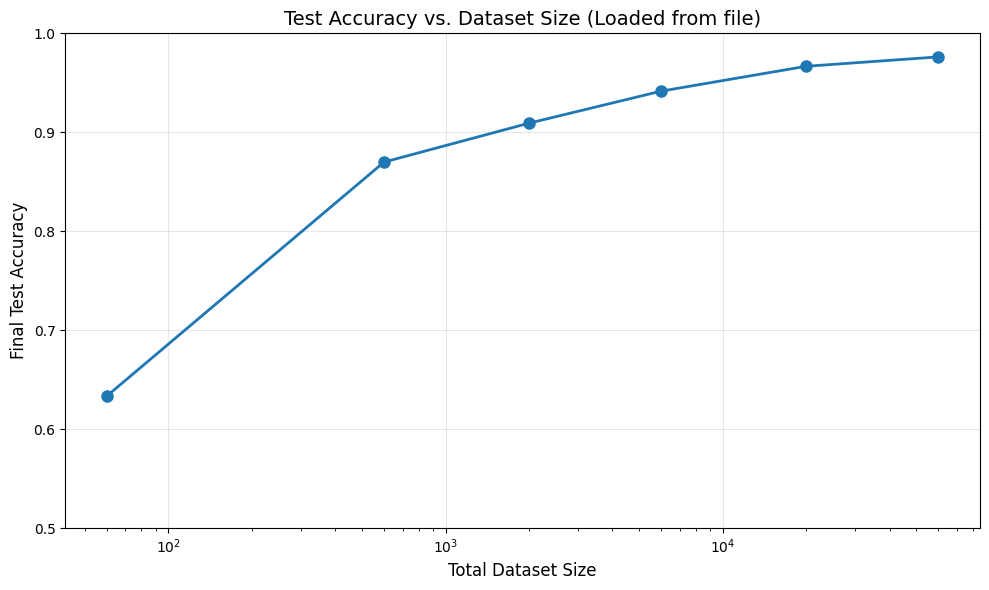

In [8]:
# Load the saved data
load_path = "test_accuracies.npz"  # Update path if needed
data = np.load(load_path)

# Extract the arrays
dataset_sizes = data['dataset_sizes']
final_test_accuracies = data['final_test_accuracies']

print("Loaded data successfully!")
print(f"Dataset sizes: {dataset_sizes}")
print(f"Final test accuracies: {final_test_accuracies}")

# You can now use these arrays for plotting or analysis
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, final_test_accuracies, 'o-', markersize=8, linewidth=2)
plt.xscale('log')
plt.xlabel('Total Dataset Size', fontsize=12)
plt.ylabel('Final Test Accuracy', fontsize=12)
plt.title('Test Accuracy vs. Dataset Size (Loaded from file)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim((0.5, 1.0))
plt.tight_layout()
plt.show()

In [9]:
# Find global min and max across ALL landscapes for consistent fixed scaling
global_vmin_smallest = float('inf')
global_vmin_largest = float('-inf')
all_vmax = float('-inf')

for idx in range(len(loss_grids_list)):
    if 0 <= idx < len(loss_grids_list):
        loss_grid = loss_grids_list[idx]
        current_min = loss_grid[loss_grid > 0].min()
        current_max = loss_grid.max()
        global_vmin_smallest = min(global_vmin_smallest, current_min)
        global_vmin_largest = max(global_vmin_largest, current_min)
        all_vmax = max(all_vmax, current_max)

print(f"Global min across selected landscapes (smallest value, features are indistinguishable with low variability): {global_vmin_smallest:.6f}")
print(f"Global min across selected landscapes (largest value that captures the variability in the most constant version): {global_vmin_largest:.6f}")
print(f"Global max across ALL landscapes: {all_vmax:.6f}")

Global min across selected landscapes (smallest value, features are indistinguishable with low variability): 0.000113
Global min across selected landscapes (largest value that captures the variability in the most constant version): 0.002054
Global max across ALL landscapes: 15.162881


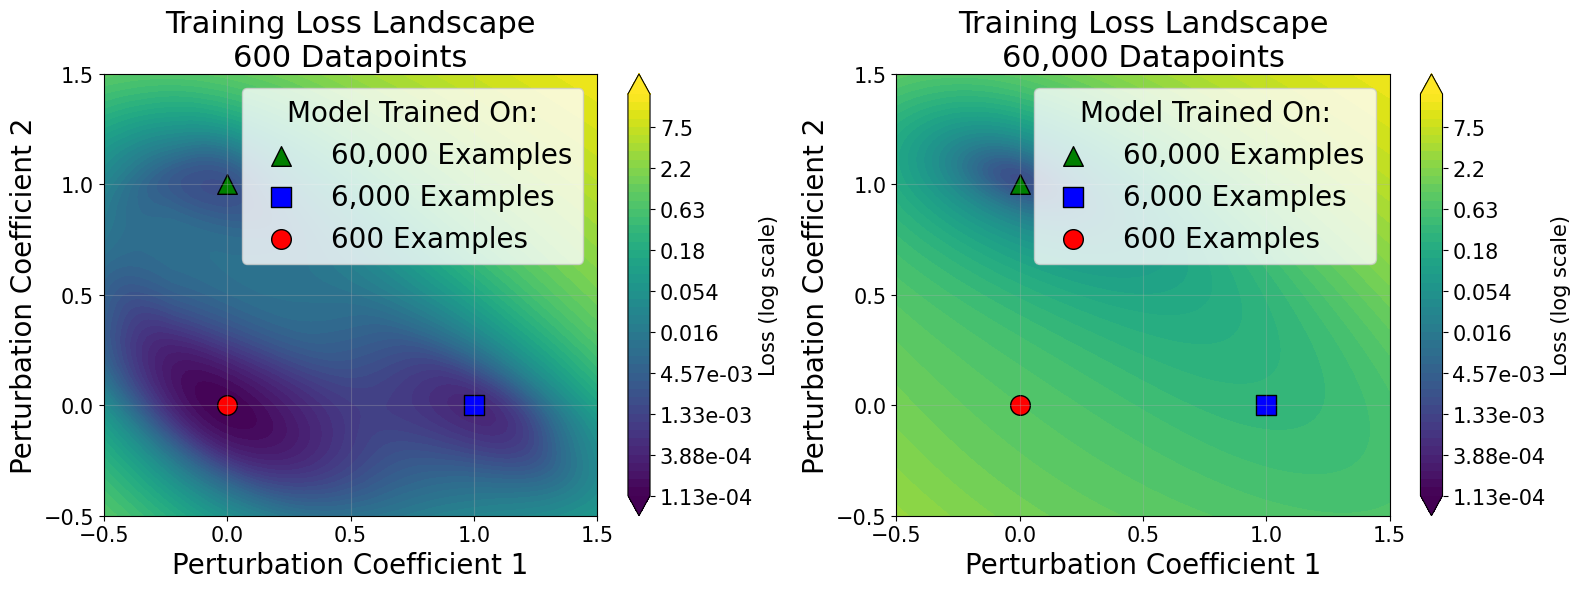

In [12]:
# Generate an example plot before generating all in a folder
base_data = 60
additional_data = additional_data_amounts[0]
loss_grid = loss_grids_list[0]

additional_data2 = additional_data_amounts[-1]
loss_grid2 = loss_grids_list[-1]

model_labels = ['600 Examples', 
                '6,000 Examples',
                '60,000 Examples']
xticks = [-0.5, 0, 0.5, 1.0, 1.5]
yticks = [-0.5, 0, 0.5, 1.0, 1.5]

# First, create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first landscape on the left subplot
contour = subplot_2d_loss_landscape(
    ax=ax1,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data,
    model_labels=model_labels,
    vmin=global_vmin_smallest, 
    vmax=20,
    title=f"Training Loss Landscape\n{additional_data+base_data:,} Datapoints",  # Custom title
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=20, colorbar_fontsize = 15,
    xlabel="Perturbation Coefficient 1",  # Custom xlabel
    ylabel="Perturbation Coefficient 2",   # Custom ylabel
    legend_title = "Model Trained On:", legend_title_size = 20,
)

# Plot the second landscape on the right subplot
subplot_2d_loss_landscape(
    ax=ax2,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid2,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data2,
    model_labels=model_labels,
    vmin=global_vmin_smallest, 
    vmax=20,
    title=f"Training Loss Landscape\n{additional_data2+base_data:,} Datapoints",  # Custom title
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=20, colorbar_fontsize = 15,
    xlabel="Perturbation Coefficient 1",  # Custom xlabel
    ylabel="Perturbation Coefficient 2",   # Custom ylabel
    legend_title = "Model Trained On:", legend_title_size = 20,
)

# Adjust layout and save if needed
plt.tight_layout()

# Save the combined figure
Path("plots_detailed/figure").mkdir(parents=True, exist_ok=True)

# Save the figure
plt.savefig("plots_detailed/figure/overview.png", dpi=300, bbox_inches='tight')
plt.show()

## Figure Plot

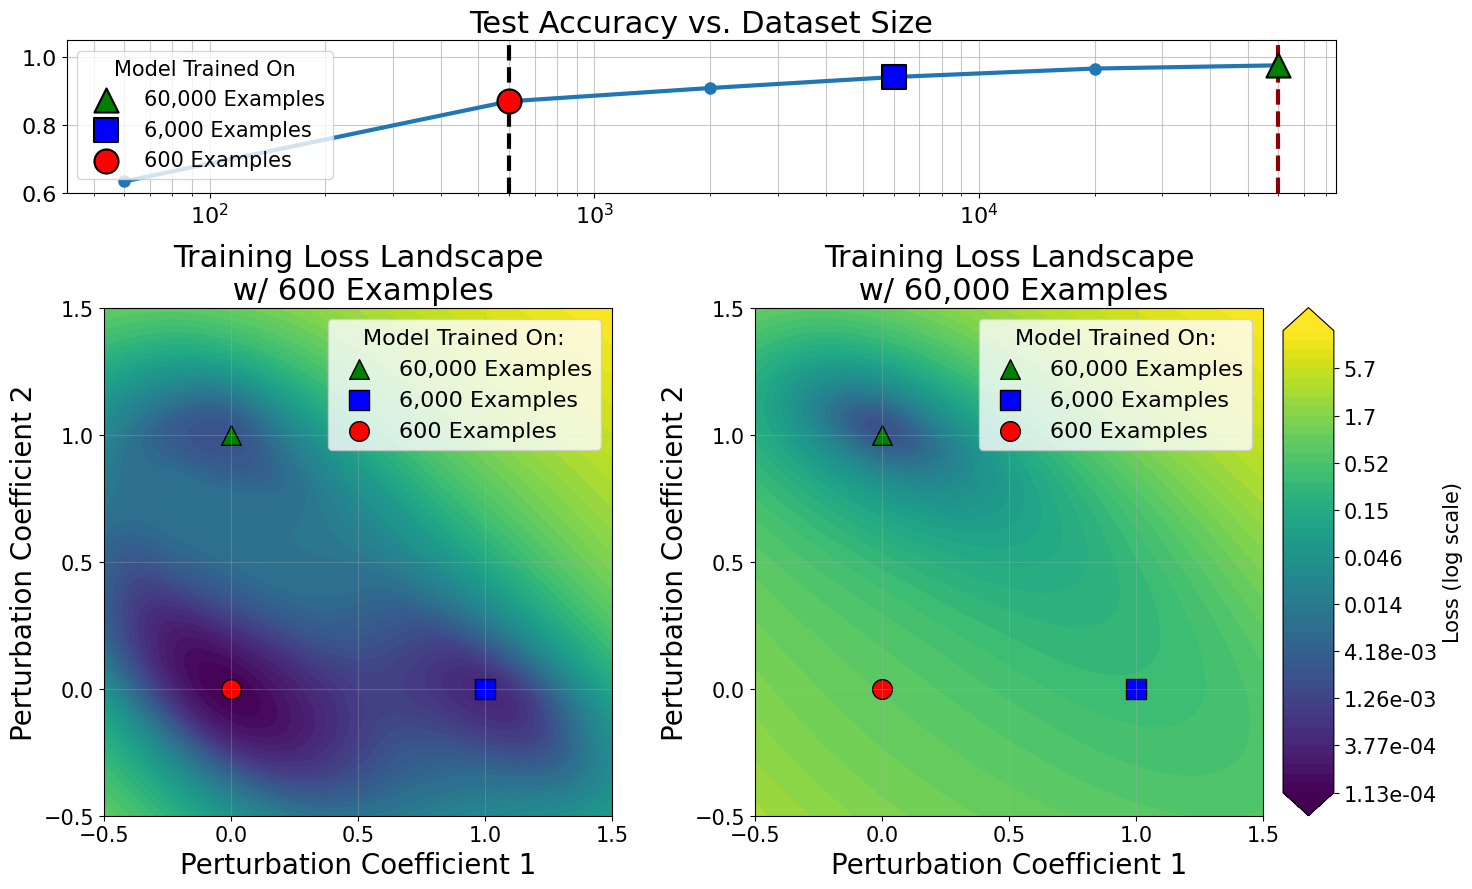

In [13]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Figure and layout setup ---
fig = plt.figure(figsize=(15, 9))  # tall enough to fit top and bottom nicely
gs = GridSpec(2, 2, height_ratios=[0.3, 1], width_ratios=[1, 1], figure=fig)

# Top row: accuracy plot (spans both columns)
ax_top = fig.add_subplot(gs[0, :])

# Bottom row: left and right loss landscapes
ax_bottom_left = fig.add_subplot(gs[1, 0])
ax_bottom_right = fig.add_subplot(gs[1, 1])

# Make bottom two square
ax_bottom_left.set_aspect('equal', adjustable='box')
ax_bottom_right.set_aspect('equal', adjustable='box')

# --- Top subplot: Accuracy vs dataset size ---
ax_top.plot(dataset_sizes, final_test_accuracies, 'o-', markersize=8, linewidth=3)
ax_top.set_xscale('log')

# Custom markers for the three models
ax_top.scatter(60000, final_test_accuracies[np.where(dataset_sizes == 60000)[0]],
               color='green', s=300, marker='^',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[2])
ax_top.scatter(6000, final_test_accuracies[np.where(dataset_sizes == 6000)[0]],
               color='blue', s=300, marker='s',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[1])
ax_top.scatter(600, final_test_accuracies[np.where(dataset_sizes == 600)[0]],
               color='red', s=300, marker='o',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[0])

# Vertical line for current additional data
ax_top.axvline(base_data + additional_data, color='black', linestyle='--', linewidth=3)
ax_top.axvline(base_data + additional_data2, color='darkred', linestyle='--', linewidth=3)

# Labels, title, ticks, legend
#ax_top.set_xlabel('Train Dataset Size', fontsize=22)
#ax_top.set_ylabel('Test Accuracy', fontsize=22)
ax_top.set_title('Test Accuracy vs. Dataset Size', fontsize=22)
ax_top.tick_params(axis='both', which='major', labelsize=16)
ax_top.tick_params(axis='both', which='minor', labelsize=14)
ax_top.grid(True, which="both", alpha=0.7)
ax_top.set_ylim((0.6, 1.05))

legend_title = "Model Trained On"
title_size = 15
ax_top.legend(title=legend_title,
              title_fontsize=title_size,
              fontsize=15,
              loc='upper left')

# --- Bottom left subplot: Loss landscape 1 ---
contour1 = subplot_2d_loss_landscape(
    ax=ax_bottom_left,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=15,
    title=f"Training Loss Landscape\n w/ {additional_data+base_data:,} Examples", 
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = False,
    legend_title = "Model Trained On:", legend_title_size = 16,
)

divider = make_axes_locatable(ax_bottom_right)
cax = divider.append_axes("right", size="10%", pad=0.2)

# --- Bottom right subplot: Loss landscape 2 ---
contour2 = subplot_2d_loss_landscape(
    ax=ax_bottom_right,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid2,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data2,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=15,
    title=f"Training Loss Landscape\n w/ {additional_data2+base_data:,} Examples", 
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = True,
    cax=cax,
    legend_title = "Model Trained On:", legend_title_size = 16,
)

plt.tight_layout()

# Ensure save folder exists
Path("plots_detailed/figure").mkdir(parents=True, exist_ok=True)

# Save figure
plt.savefig("plots_detailed/figure/combined_figure.png", dpi=300, bbox_inches='tight')
plt.show()

## Other Colorbar Limits

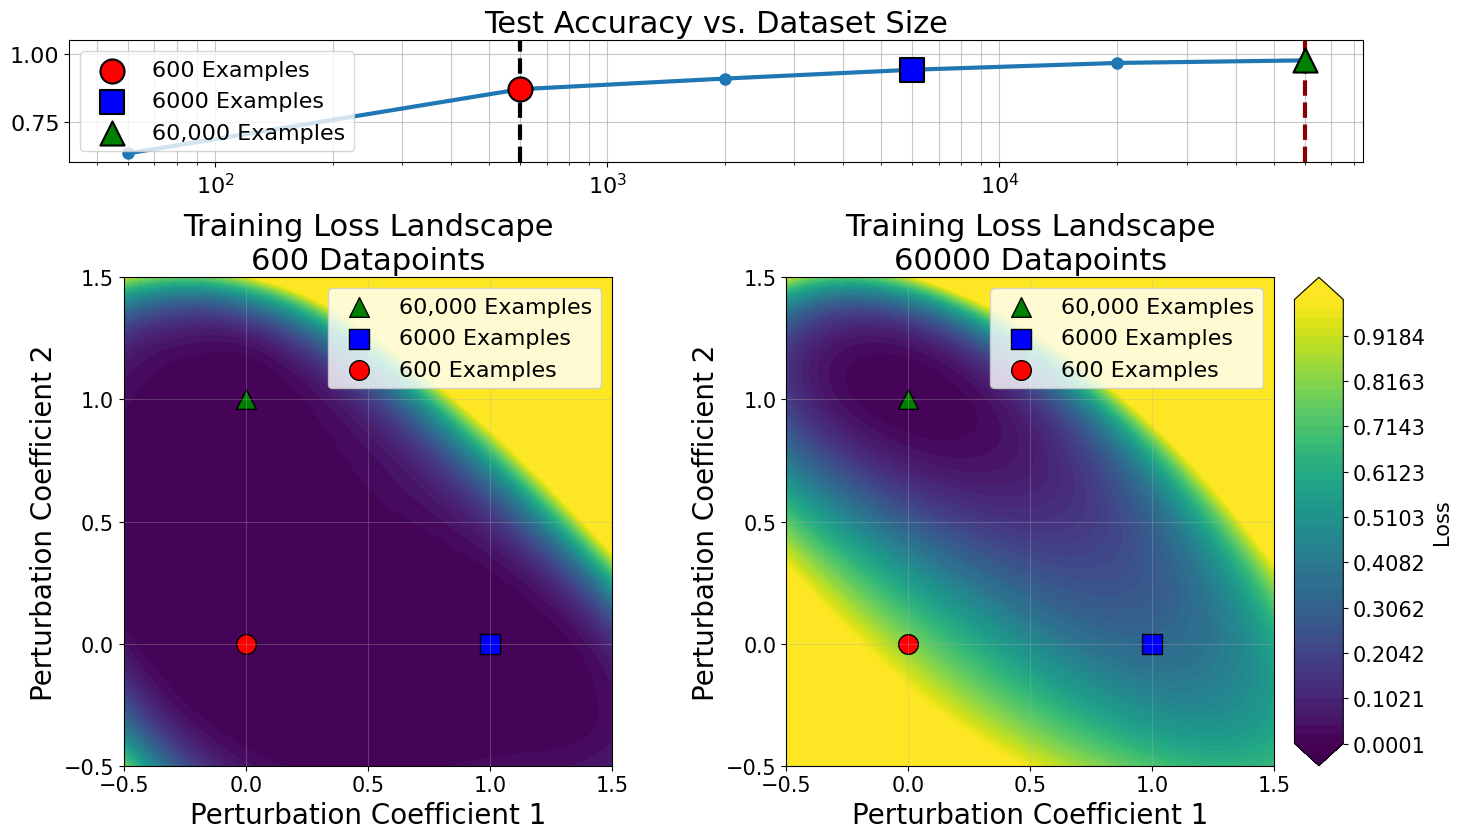

In [12]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Figure and layout setup ---
fig = plt.figure(figsize=(15, 8.5))  # tall enough to fit top and bottom nicely
gs = GridSpec(2, 2, height_ratios=[0.25, 1], width_ratios=[1, 1], figure=fig)

# Top row: accuracy plot (spans both columns)
ax_top = fig.add_subplot(gs[0, :])

# Bottom row: left and right loss landscapes
ax_bottom_left = fig.add_subplot(gs[1, 0])
ax_bottom_right = fig.add_subplot(gs[1, 1])

# Make bottom two square
ax_bottom_left.set_aspect('equal', adjustable='box')
ax_bottom_right.set_aspect('equal', adjustable='box')

# --- Top subplot: Accuracy vs dataset size ---
ax_top.plot(dataset_sizes, final_test_accuracies, 'o-', markersize=8, linewidth=3)
ax_top.set_xscale('log')

# Custom markers for the three models
ax_top.scatter(600, final_test_accuracies[np.where(dataset_sizes == 600)[0]],
               color='red', s=300, marker='o',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[0])
ax_top.scatter(6000, final_test_accuracies[np.where(dataset_sizes == 6000)[0]],
               color='blue', s=300, marker='s',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[1])
ax_top.scatter(60000, final_test_accuracies[np.where(dataset_sizes == 60000)[0]],
               color='green', s=300, marker='^',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[2])

# Vertical line for current additional data
ax_top.axvline(base_data + additional_data, color='black', linestyle='--', linewidth=3)
ax_top.axvline(base_data + additional_data2, color='darkred', linestyle='--', linewidth=3)

# Labels, title, ticks, legend
#ax_top.set_xlabel('Train Dataset Size', fontsize=22)
#ax_top.set_ylabel('Test Accuracy', fontsize=22)
ax_top.set_title('Test Accuracy vs. Dataset Size', fontsize=22)
ax_top.tick_params(axis='both', which='major', labelsize=16)
ax_top.tick_params(axis='both', which='minor', labelsize=14)
ax_top.grid(True, which="both", alpha=0.7)
ax_top.set_ylim((0.6, 1.05))
ax_top.legend(fontsize=16, loc='upper left')

# --- Bottom left subplot: Loss landscape 1 ---
contour1 = subplot_2d_loss_landscape(
    ax=ax_bottom_left,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=1,
    title=f"Training Loss Landscape\n{additional_data+base_data} Datapoints", 
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = False,
    log_scale=False,  
)

divider = make_axes_locatable(ax_bottom_right)
cax = divider.append_axes("right", size="10%", pad=0.2)

# --- Bottom right subplot: Loss landscape 2 ---
contour2 = subplot_2d_loss_landscape(
    ax=ax_bottom_right,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid2,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data2,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=1,
    title=f"Training Loss Landscape\n{additional_data2+base_data} Datapoints", 
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = True,
    cax=cax,
    log_scale=False,  
)

plt.tight_layout()

# Ensure save folder exists
Path("plots_detailed/figure").mkdir(parents=True, exist_ok=True)

# Save figure
plt.savefig("plots_detailed/figure/combined_figure_no_log.png", dpi=300, bbox_inches='tight')
plt.show()

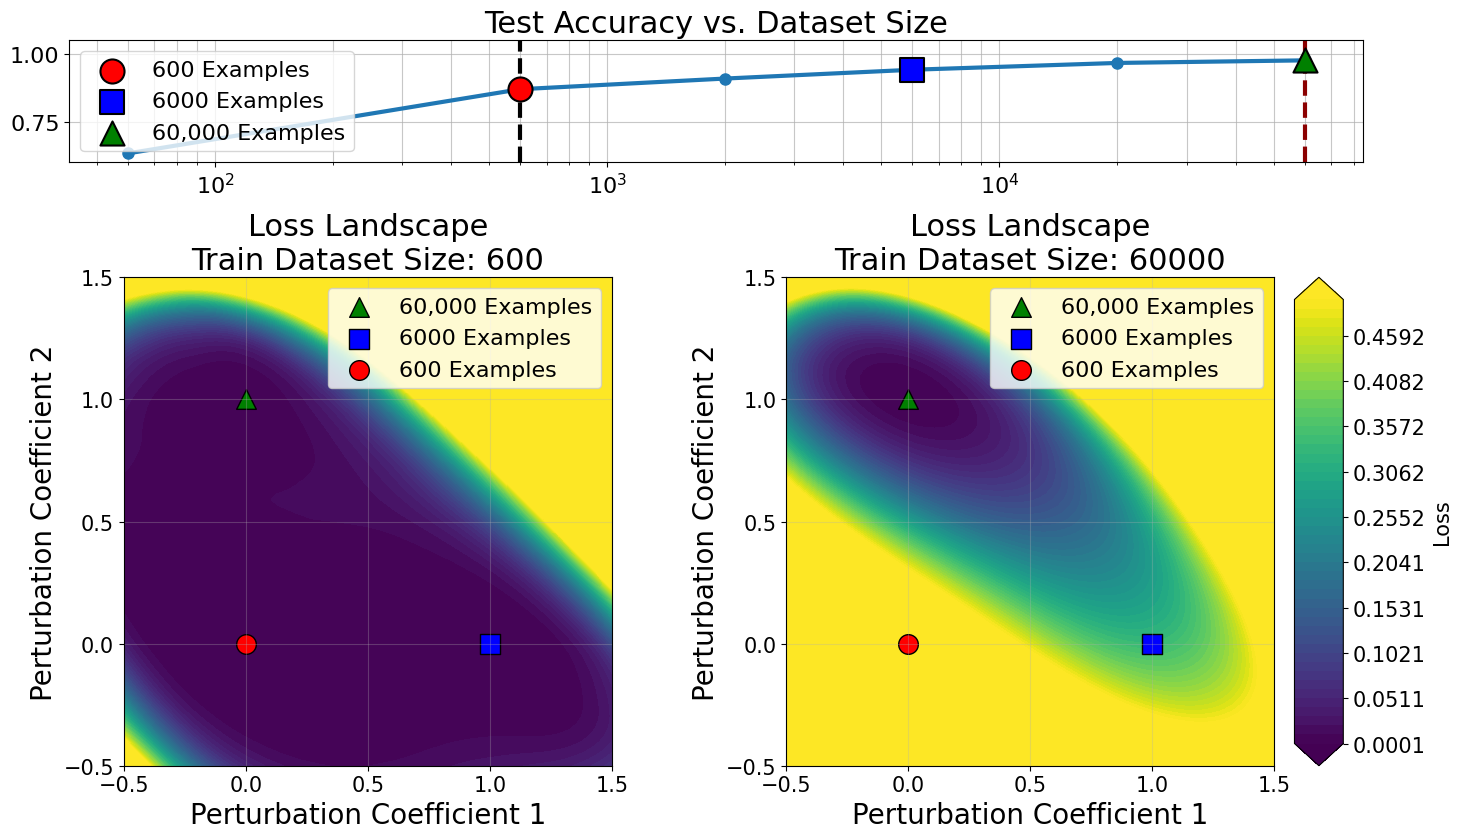

In [13]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Figure and layout setup ---
fig = plt.figure(figsize=(15, 8.5))  # tall enough to fit top and bottom nicely
gs = GridSpec(2, 2, height_ratios=[0.25, 1], width_ratios=[1, 1], figure=fig)

# Top row: accuracy plot (spans both columns)
ax_top = fig.add_subplot(gs[0, :])

# Bottom row: left and right loss landscapes
ax_bottom_left = fig.add_subplot(gs[1, 0])
ax_bottom_right = fig.add_subplot(gs[1, 1])

# Make bottom two square
ax_bottom_left.set_aspect('equal', adjustable='box')
ax_bottom_right.set_aspect('equal', adjustable='box')

# --- Top subplot: Accuracy vs dataset size ---
ax_top.plot(dataset_sizes, final_test_accuracies, 'o-', markersize=8, linewidth=3)
ax_top.set_xscale('log')

# Custom markers for the three models
ax_top.scatter(600, final_test_accuracies[np.where(dataset_sizes == 600)[0]],
               color='red', s=300, marker='o',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[0])
ax_top.scatter(6000, final_test_accuracies[np.where(dataset_sizes == 6000)[0]],
               color='blue', s=300, marker='s',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[1])
ax_top.scatter(60000, final_test_accuracies[np.where(dataset_sizes == 60000)[0]],
               color='green', s=300, marker='^',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[2])

# Vertical line for current additional data
ax_top.axvline(base_data + additional_data, color='black', linestyle='--', linewidth=3)
ax_top.axvline(base_data + additional_data2, color='darkred', linestyle='--', linewidth=3)

# Labels, title, ticks, legend
#ax_top.set_xlabel('Train Dataset Size', fontsize=22)
#ax_top.set_ylabel('Test Accuracy', fontsize=22)
ax_top.set_title('Test Accuracy vs. Dataset Size', fontsize=22)
ax_top.tick_params(axis='both', which='major', labelsize=16)
ax_top.tick_params(axis='both', which='minor', labelsize=14)
ax_top.grid(True, which="both", alpha=0.7)
ax_top.set_ylim((0.6, 1.05))
ax_top.legend(fontsize=16, loc='upper left')

# --- Bottom left subplot: Loss landscape 1 ---
contour1 = subplot_2d_loss_landscape(
    ax=ax_bottom_left,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=0.5,
    title=f"Loss Landscape\nTrain Dataset Size: {additional_data+base_data}",
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = False,
    log_scale=False,  
)

divider = make_axes_locatable(ax_bottom_right)
cax = divider.append_axes("right", size="10%", pad=0.2)

# --- Bottom right subplot: Loss landscape 2 ---
contour2 = subplot_2d_loss_landscape(
    ax=ax_bottom_right,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid2,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data2,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=0.5,
    title=f"Loss Landscape\nTrain Dataset Size: {additional_data2+base_data}",
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = True,
    cax=cax,
    log_scale=False,  
)

plt.tight_layout()

# Ensure save folder exists
Path("plots_detailed/figure").mkdir(parents=True, exist_ok=True)

# Save figure
plt.savefig("plots_detailed/figure/combined_figure_no_log2.png", dpi=300, bbox_inches='tight')
plt.show()

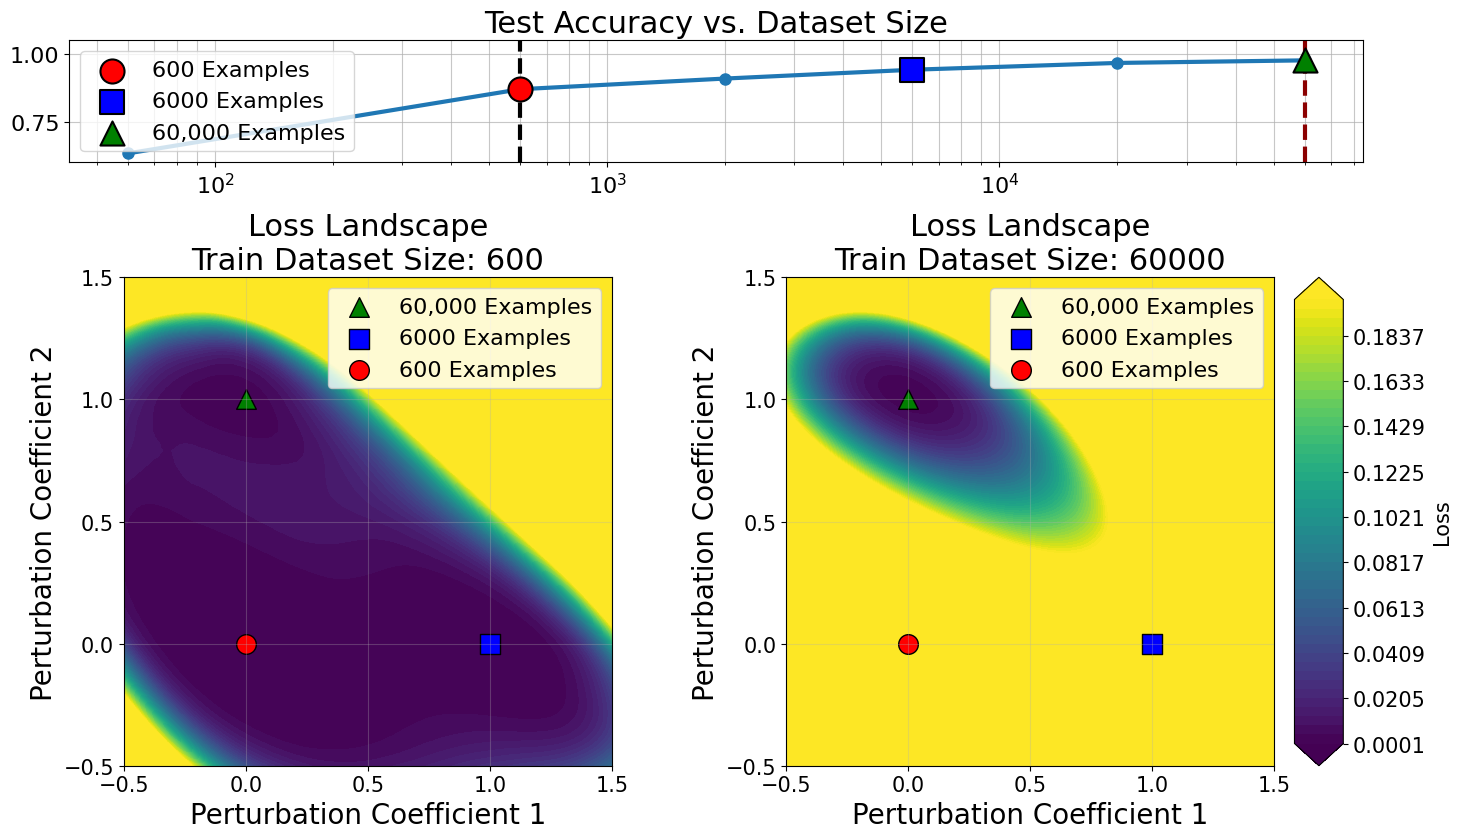

In [14]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Figure and layout setup ---
fig = plt.figure(figsize=(15, 8.5))  # tall enough to fit top and bottom nicely
gs = GridSpec(2, 2, height_ratios=[0.25, 1], width_ratios=[1, 1], figure=fig)

# Top row: accuracy plot (spans both columns)
ax_top = fig.add_subplot(gs[0, :])

# Bottom row: left and right loss landscapes
ax_bottom_left = fig.add_subplot(gs[1, 0])
ax_bottom_right = fig.add_subplot(gs[1, 1])

# Make bottom two square
ax_bottom_left.set_aspect('equal', adjustable='box')
ax_bottom_right.set_aspect('equal', adjustable='box')

# --- Top subplot: Accuracy vs dataset size ---
ax_top.plot(dataset_sizes, final_test_accuracies, 'o-', markersize=8, linewidth=3)
ax_top.set_xscale('log')

# Custom markers for the three models
ax_top.scatter(600, final_test_accuracies[np.where(dataset_sizes == 600)[0]],
               color='red', s=300, marker='o',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[0])
ax_top.scatter(6000, final_test_accuracies[np.where(dataset_sizes == 6000)[0]],
               color='blue', s=300, marker='s',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[1])
ax_top.scatter(60000, final_test_accuracies[np.where(dataset_sizes == 60000)[0]],
               color='green', s=300, marker='^',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[2])

# Vertical line for current additional data
ax_top.axvline(base_data + additional_data, color='black', linestyle='--', linewidth=3)
ax_top.axvline(base_data + additional_data2, color='darkred', linestyle='--', linewidth=3)

# Labels, title, ticks, legend
#ax_top.set_xlabel('Train Dataset Size', fontsize=22)
#ax_top.set_ylabel('Test Accuracy', fontsize=22)
ax_top.set_title('Test Accuracy vs. Dataset Size', fontsize=22)
ax_top.tick_params(axis='both', which='major', labelsize=16)
ax_top.tick_params(axis='both', which='minor', labelsize=14)
ax_top.grid(True, which="both", alpha=0.7)
ax_top.set_ylim((0.6, 1.05))
ax_top.legend(fontsize=16, loc='upper left')

# --- Bottom left subplot: Loss landscape 1 ---
contour1 = subplot_2d_loss_landscape(
    ax=ax_bottom_left,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=0.2,
    title=f"Loss Landscape\nTrain Dataset Size: {additional_data+base_data}",
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = False,
    log_scale=False,  
)

divider = make_axes_locatable(ax_bottom_right)
cax = divider.append_axes("right", size="10%", pad=0.2)

# --- Bottom right subplot: Loss landscape 2 ---
contour2 = subplot_2d_loss_landscape(
    ax=ax_bottom_right,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid2,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data2,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=0.2,
    title=f"Loss Landscape\nTrain Dataset Size: {additional_data2+base_data}",
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = True,
    cax=cax,
    log_scale=False,  
)

plt.tight_layout()

# Ensure save folder exists
Path("plots_detailed/figure").mkdir(parents=True, exist_ok=True)

# Save figure
plt.savefig("plots_detailed/figure/combined_figure_no_log3.png", dpi=300, bbox_inches='tight')
plt.show()

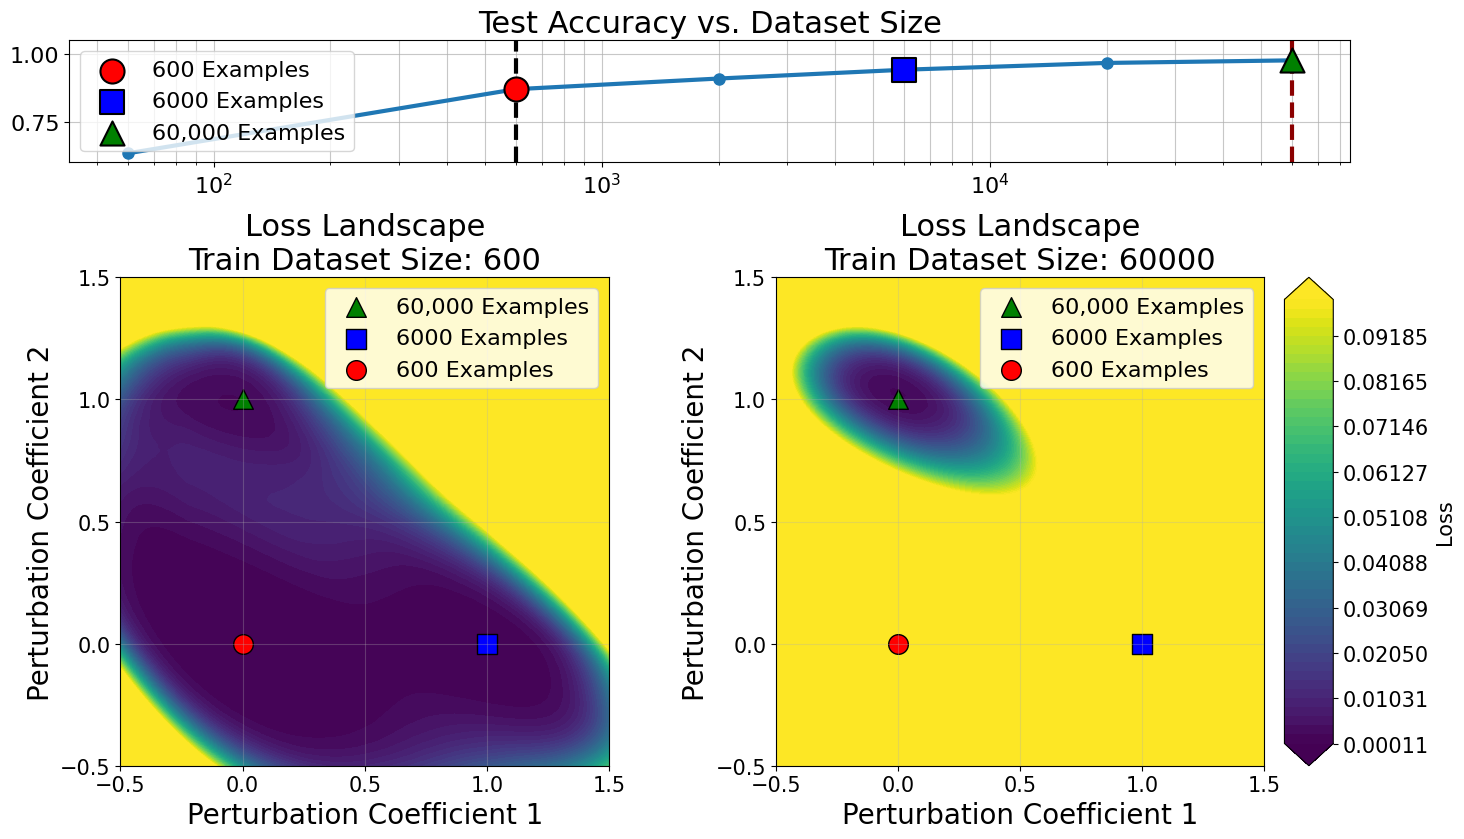

In [15]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Figure and layout setup ---
fig = plt.figure(figsize=(15, 8.5))  # tall enough to fit top and bottom nicely
gs = GridSpec(2, 2, height_ratios=[0.25, 1], width_ratios=[1, 1], figure=fig)

# Top row: accuracy plot (spans both columns)
ax_top = fig.add_subplot(gs[0, :])

# Bottom row: left and right loss landscapes
ax_bottom_left = fig.add_subplot(gs[1, 0])
ax_bottom_right = fig.add_subplot(gs[1, 1])

# Make bottom two square
ax_bottom_left.set_aspect('equal', adjustable='box')
ax_bottom_right.set_aspect('equal', adjustable='box')

# --- Top subplot: Accuracy vs dataset size ---
ax_top.plot(dataset_sizes, final_test_accuracies, 'o-', markersize=8, linewidth=3)
ax_top.set_xscale('log')

# Custom markers for the three models
ax_top.scatter(600, final_test_accuracies[np.where(dataset_sizes == 600)[0]],
               color='red', s=300, marker='o',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[0])
ax_top.scatter(6000, final_test_accuracies[np.where(dataset_sizes == 6000)[0]],
               color='blue', s=300, marker='s',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[1])
ax_top.scatter(60000, final_test_accuracies[np.where(dataset_sizes == 60000)[0]],
               color='green', s=300, marker='^',
               edgecolors='black', linewidths=1.5, zorder=10, label=model_labels[2])

# Vertical line for current additional data
ax_top.axvline(base_data + additional_data, color='black', linestyle='--', linewidth=3)
ax_top.axvline(base_data + additional_data2, color='darkred', linestyle='--', linewidth=3)

# Labels, title, ticks, legend
#ax_top.set_xlabel('Train Dataset Size', fontsize=22)
#ax_top.set_ylabel('Test Accuracy', fontsize=22)
ax_top.set_title('Test Accuracy vs. Dataset Size', fontsize=22)
ax_top.tick_params(axis='both', which='major', labelsize=16)
ax_top.tick_params(axis='both', which='minor', labelsize=14)
ax_top.grid(True, which="both", alpha=0.7)
ax_top.set_ylim((0.6, 1.05))
ax_top.legend(fontsize=16, loc='upper left')

# --- Bottom left subplot: Loss landscape 1 ---
contour1 = subplot_2d_loss_landscape(
    ax=ax_bottom_left,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=0.1,
    title=f"Loss Landscape\nTrain Dataset Size: {additional_data+base_data}",
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = False,
    log_scale=False,  
)

divider = make_axes_locatable(ax_bottom_right)
cax = divider.append_axes("right", size="10%", pad=0.2)

# --- Bottom right subplot: Loss landscape 2 ---
contour2 = subplot_2d_loss_landscape(
    ax=ax_bottom_right,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid2,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data2,
    model_labels=model_labels,
    vmin=global_vmin_smallest,
    vmax=0.1,
    title=f"Loss Landscape\nTrain Dataset Size: {additional_data2+base_data}",
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = True,
    cax=cax,
    log_scale=False,  
)

plt.tight_layout()

# Ensure save folder exists
Path("plots_detailed/figure").mkdir(parents=True, exist_ok=True)

# Save figure
plt.savefig("plots_detailed/figure/combined_figure_no_log4.png", dpi=300, bbox_inches='tight')
plt.show()

## Sample Plot For Videos

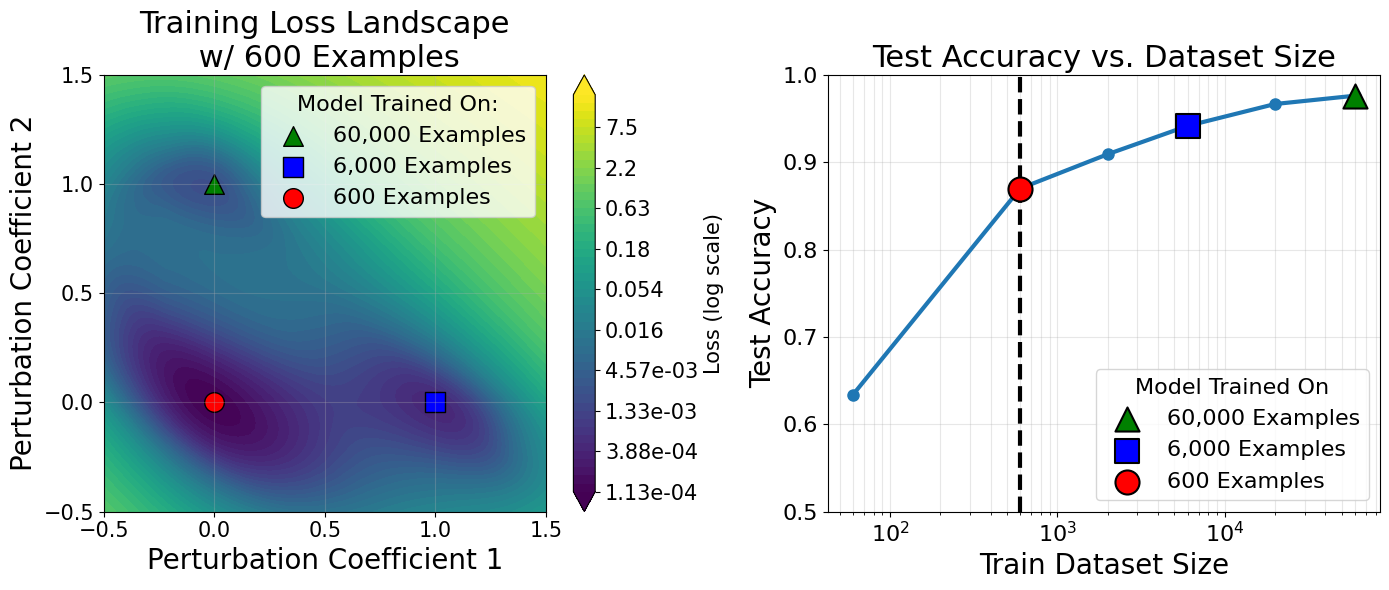

In [14]:
# First landscape parameters
additional_data = additional_data_amounts[0]
loss_grid = loss_grids_list[0]

# Create figure with two subplots (left: loss landscape, right: line plot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Left subplot: Loss landscape ---
contour = subplot_2d_loss_landscape(
    ax=ax1,
    C1_grid=C1_grid,
    C2_grid=C2_grid,
    loss_grid=loss_grid,
    span_low=span_low,
    span_high=span_high,
    xticks=xticks,
    yticks=yticks,
    tick_fontsize=15,
    additional_data=additional_data,
    model_labels=model_labels,
    vmin=global_vmin_smallest, 
    vmax=20,
    title=f"Training Loss Landscape\n w/ {additional_data+base_data} Examples", 
    title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
    legend_fontsize=16, colorbar_fontsize=15,
    xlabel="Perturbation Coefficient 1",
    ylabel="Perturbation Coefficient 2",
    show_colorbar = True,
    legend_title = "Model Trained On:", legend_title_size = 16,
)

# --- Right subplot: Accuracy vs dataset size ---
ax2.plot(dataset_sizes, final_test_accuracies, 'o-', markersize=8, linewidth=3)
ax2.set_xscale('log')

# Add custom markers for the three models (on top, with borders)
ax2.scatter(60000, final_test_accuracies[np.where(dataset_sizes == 60000)[0]],
            color='green', s=300, marker='^',
            edgecolors='black', linewidths=1.5,
            zorder=10, label=model_labels[2])

ax2.scatter(6000, final_test_accuracies[np.where(dataset_sizes == 6000)[0]],
            color='blue', s=300, marker='s',
            edgecolors='black', linewidths=1.5,
            zorder=10, label=model_labels[1])

ax2.scatter(600, final_test_accuracies[np.where(dataset_sizes == 600)[0]],
            color='red', s=300, marker='o',
            edgecolors='black', linewidths=1.5,
            zorder=10, label=model_labels[0])

# Add vertical dashed line at (base_data + additional_data)
ax2.axvline(base_data + additional_data, color='black', linestyle='--', linewidth=3)

# Axis labels and formatting
ax2.set_xlabel('Train Dataset Size', fontsize=20)
ax2.set_ylabel('Test Accuracy', fontsize=20)
ax2.set_title('Test Accuracy vs. Dataset Size', fontsize=22)

# Make tick labels bigger
ax2.tick_params(axis='both', which='major', labelsize=16)  # <-- NEW
ax2.tick_params(axis='both', which='minor', labelsize=14)  # <-- Optional (for log minor ticks)

ax2.grid(True, which="both", alpha=0.3)
ax2.set_ylim((0.5, 1.0))

legend_title = "Model Trained On"
title_size = 16
ax2.legend(title=legend_title,
              title_fontsize=title_size,
              fontsize=16,
              loc='lower right')
plt.tight_layout()
# Ensure save folder exists
Path("plots_detailed/figure").mkdir(parents=True, exist_ok=True)

# Save figure
plt.savefig("plots_detailed/figure/sample.png", dpi=300, bbox_inches='tight')
plt.show()


With good looking plots, we move on to generating the frames for a video.

In [15]:
# Ensure save folder exists
output_folder = Path("plots_detailed/")
output_folder.mkdir(parents=True, exist_ok=True)

start_time = time.time()

for idx in range(len(loss_grids_list)):
    additional_data = additional_data_amounts[idx]
    loss_grid = loss_grids_list[idx]
    
    print(f"\n=== Generating detailed plot for index {idx}, additional data: {additional_data} ===")
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # --- Left subplot: Loss landscape ---
    contour = subplot_2d_loss_landscape(
        ax=ax1,
        C1_grid=C1_grid,
        C2_grid=C2_grid,
        loss_grid=loss_grid,
        span_low=span_low,
        span_high=span_high,
        xticks=xticks,
        yticks=yticks,
        tick_fontsize=15,
        additional_data=additional_data,
        model_labels=model_labels,
        vmin=global_vmin_smallest, 
        vmax=20,
        title=f"Training Loss Landscape\n w/ {additional_data+base_data:,} Examples", 
        title_fontsize=22, xlabel_fontsize=20, ylabel_fontsize=20,
        legend_fontsize=16, colorbar_fontsize=15,
        xlabel="Perturbation Coefficient 1",
        ylabel="Perturbation Coefficient 2",
        show_colorbar = True,
        legend_title = "Model Trained On:", legend_title_size = 16,
    )
    
    # --- Right subplot: Accuracy vs dataset size ---
    ax2.plot(dataset_sizes, final_test_accuracies, 'o-', markersize=8, linewidth=3)
    ax2.set_xscale('log')

    # Add custom markers for the three models (on top, with borders)
    ax2.scatter(60000, final_test_accuracies[np.where(dataset_sizes == 60000)[0]],
                color='green', s=300, marker='^',
                edgecolors='black', linewidths=1.5,
                zorder=10, label=model_labels[2])
    
    ax2.scatter(6000, final_test_accuracies[np.where(dataset_sizes == 6000)[0]],
                color='blue', s=300, marker='s',
                edgecolors='black', linewidths=1.5,
                zorder=10, label=model_labels[1])
    
    ax2.scatter(600, final_test_accuracies[np.where(dataset_sizes == 600)[0]],
                color='red', s=300, marker='o',
                edgecolors='black', linewidths=1.5,
                zorder=10, label=model_labels[0])

    # Vertical dashed line for current additional_data
    ax2.axvline(base_data + additional_data, color='black', linestyle='--', linewidth=3)

    # Axis labels, title, ticks, legend
    ax2.set_xlabel('Train Dataset Size', fontsize=20)
    ax2.set_ylabel('Test Accuracy', fontsize=20)
    ax2.set_title('Test Accuracy vs. Dataset Size', fontsize=22)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    ax2.tick_params(axis='both', which='minor', labelsize=14)
    ax2.grid(True, which="both", alpha=0.3)
    ax2.set_ylim((0.5, 1.0))

    legend_title = "Model Trained On"
    title_size = 16
    ax2.legend(title=legend_title,
                  title_fontsize=title_size,
                  fontsize=16,
                  loc='lower right')
    plt.tight_layout()
    
    
    # Save figure with sequential, zero-padded index
    save_path = output_folder / f"landscape_2d_detailed_{idx:04d}.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)  # Free memory
    
end_time = time.time()
elapsed = end_time - start_time
print(f"\n=== Total time for generating all detailed plots: {elapsed:.2f} seconds ({elapsed/60:.2f} minutes) ===")



=== Generating detailed plot for index 0, additional data: 540 ===

=== Generating detailed plot for index 1, additional data: 567 ===

=== Generating detailed plot for index 2, additional data: 594 ===

=== Generating detailed plot for index 3, additional data: 621 ===

=== Generating detailed plot for index 4, additional data: 648 ===

=== Generating detailed plot for index 5, additional data: 675 ===

=== Generating detailed plot for index 6, additional data: 702 ===

=== Generating detailed plot for index 7, additional data: 729 ===

=== Generating detailed plot for index 8, additional data: 756 ===

=== Generating detailed plot for index 9, additional data: 783 ===

=== Generating detailed plot for index 10, additional data: 810 ===

=== Generating detailed plot for index 11, additional data: 837 ===

=== Generating detailed plot for index 12, additional data: 864 ===

=== Generating detailed plot for index 13, additional data: 891 ===

=== Generating detailed plot for index 14, 